<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/optimizacion_con_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Optimización paramétrica con GA

Nombre: Biología de sistemas

Fecha: 9 de diciembre del 2020

Cargar librerías

In [ ]:
install.packages("deSolve")
install.packages("GA")
install.packages("FME")
library(deSolve)
library(GA)
library(FME)

# Establecer el modelo 

In [14]:
model <- function(time, state, parms) {
  with(as.list(c(state, parms)), {

    # tasas de reacción
    rx <- vmax*(s/(ks+s))

    # velocidades de cambio
    dx <- rx*x 
    ds <- -(1/yxs)*rx*x

    return(list(c(dx,ds)))
  })
}

Establecer valor de parámetros 

In [12]:
p <- c(vmax = 1.2, ks = 180, yxs = 0.1)

Establecer condiciones iniciales 

In [9]:
s <- c(x = 0.2, s = 20)

Establecer tiempo de integración 

In [10]:
times <- seq(0,60,1)

Resolver EDOs

In [15]:
out <- ode(y = s, times = times, parms = p, func = model, method = "rk4")

Graficar resultados 

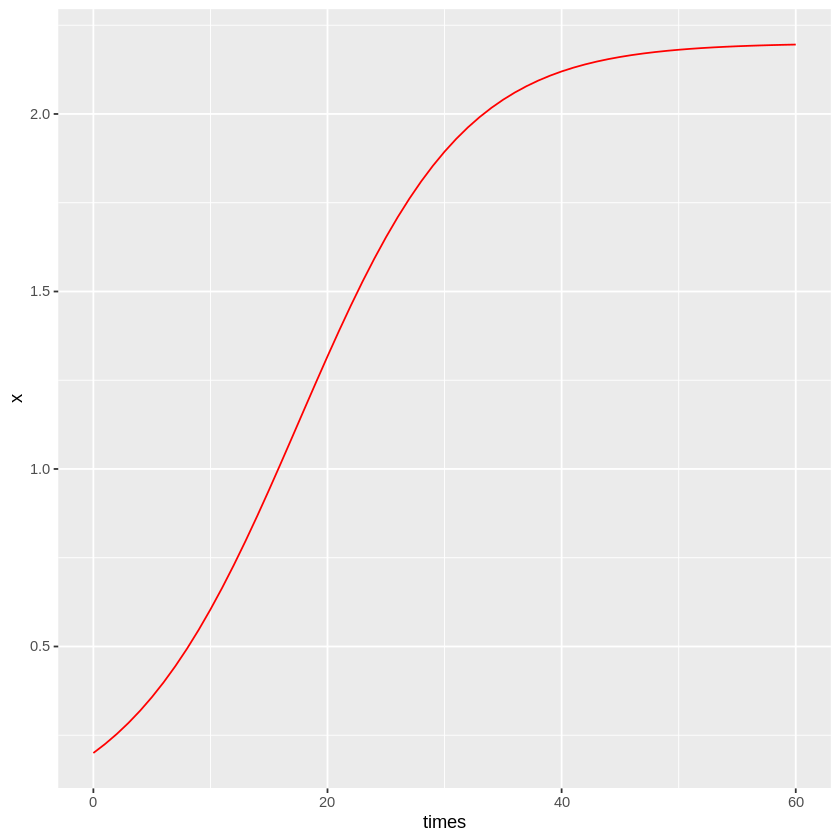

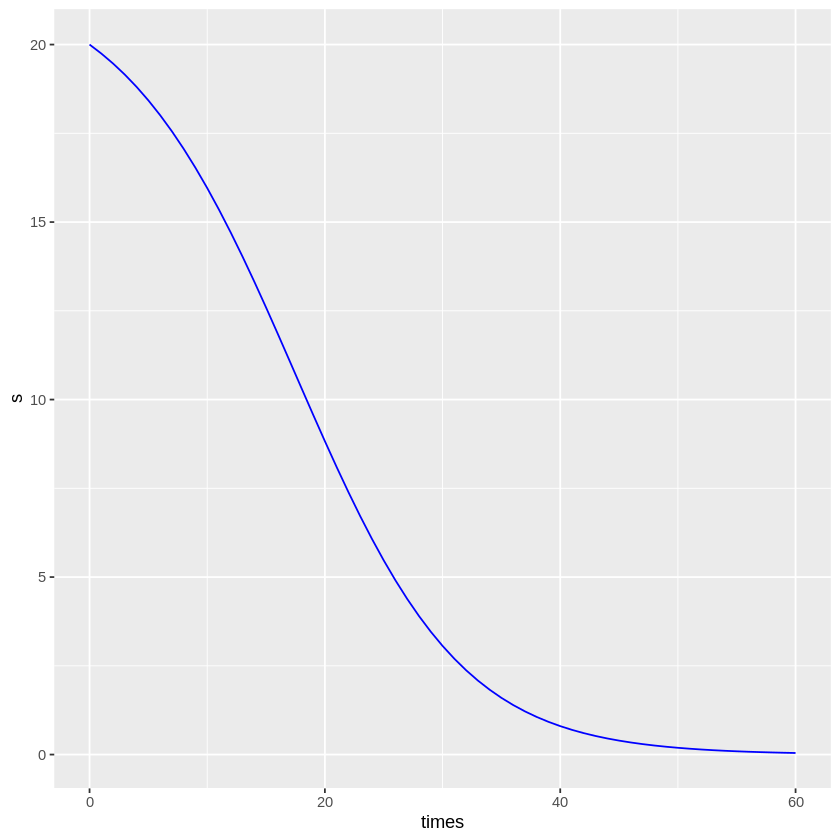

In [24]:
out <- as.data.frame(out)

ggplot(data = out, aes(x = times, y = x)) + 
  geom_line(color = "red")
ggplot(data = out, aes(x = times, y = s)) + 
  geom_line(color = "blue")

# Optimización 

In [25]:
data <- out 

## Establecer función objetivo 

En la optimización paramétrica lo más común es definir la función objetivo como la función de costo:

$$F(p) = \sum_{i = 1}^{n} \left( \hat{x} - x_{exp} \right)^{2}$$

$n$ es el número de observaciones en nuestros datos, $\hat{x}$ representa las predicciones hechas con el modelo y $x_{exp}$ los datos experimentales. 

In [64]:
cost <- function(x, data) {

  names(x) <- names(p)
  out <- ode(y = c(x = data$x[1], s = data$s[1]), 
            times = times, 
            parms = x, 
            func = model, 
            method = "rk4")

  f <- -modCost(model = out, obs = data)$model
  return(f)
}

Esta función recibe un vector de parámetros, le asigna los nombres del vector p, y utiliza los valores contenidos en el vector para simular el modelo y comparar con los datos expermientales

In [53]:
cost(p, data)

[1] 0

## Algoritmo genético 

In [65]:
GA1 <- ga(type = "real-valued",
      fitness = cost, 
      data = data,
      lower = rep(0, length(p)),
      upper = 2*p,
      popSize = 10,
      pcrossover = ,
      pmutation = ,
      elitism = ,
      maxiter = 10,
      maxFitness = )

In [66]:
GA1@solution

vmax,ks,yxs
1.486611,228.6951,0.09418781


In [38]:
p

vmax    ks   yxs 
  1.2 180.0   0.1

Nota: Los algoritmos genéticos pueden ser bastante malos si no seleccionas adecuadamente el valor de los operadores, el tamaño de la población y el número de generaciones. 

In [69]:
GA2 <- ga(type = "real-valued",
      fitness = cost, 
      data = data,
      lower = rep(0, length(p)),
      upper = 2*p,
      popSize = 50,
      pcrossover = ,
      pmutation = ,
      elitism = ,
      maxiter = 100)

In [70]:
GA2@solution

vmax,ks,yxs
1.18716,177.8887,0.1001971


In [44]:
p

vmax    ks   yxs 
  1.2 180.0   0.1

Vemos que aumentando el tamaño de población de 10 a 50, y el número de iteraciones de 10 a 100, el valor de los parámetros que se obtienen se acercan mucho más al valor que se supone como real. 